In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')


In [12]:
df = pd.read_csv('/Users/fanny/Desktop/Projet_ML/data/compact.csv')

In [23]:
df

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526976,Zimbabwe,2025-08-20,266434.0,0.0,0.0,16580.611,0.0,0.0,5740.0,0.0,...,16069010.0,41.538090,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
526977,Zimbabwe,2025-08-21,266434.0,0.0,0.0,16580.611,0.0,0.0,5740.0,0.0,...,16069010.0,41.538090,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
526978,Zimbabwe,2025-08-22,266434.0,0.0,0.0,16580.611,0.0,0.0,5740.0,0.0,...,16069010.0,41.538090,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
526979,Zimbabwe,2025-08-23,266434.0,0.0,0.0,16580.611,0.0,0.0,5740.0,0.0,...,16069010.0,41.538090,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN


Shape du dataset: (526981, 61)

Types de variables:
 float64    57
object      4
Name: count, dtype: int64

Colonnes catégorielles: ['country', 'date', 'code', 'continent']

Colonnes numériques: ['total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'excess_mortality', 'excess_mortality_cumulative', 'excess_mortality_cumulative_absolute'] ...

Statistiques descriptives numériques:
                                               count          mean  \
total_cases                                 512940.0  1.406776e+07   
new_cases                                   509714.0  1.066026e+04   
new_cases_smoothed                          508509.0  1.068554e+04   
total_cases_per_million                     512940.0  1.295320e+05   
new_cases_per_million                     

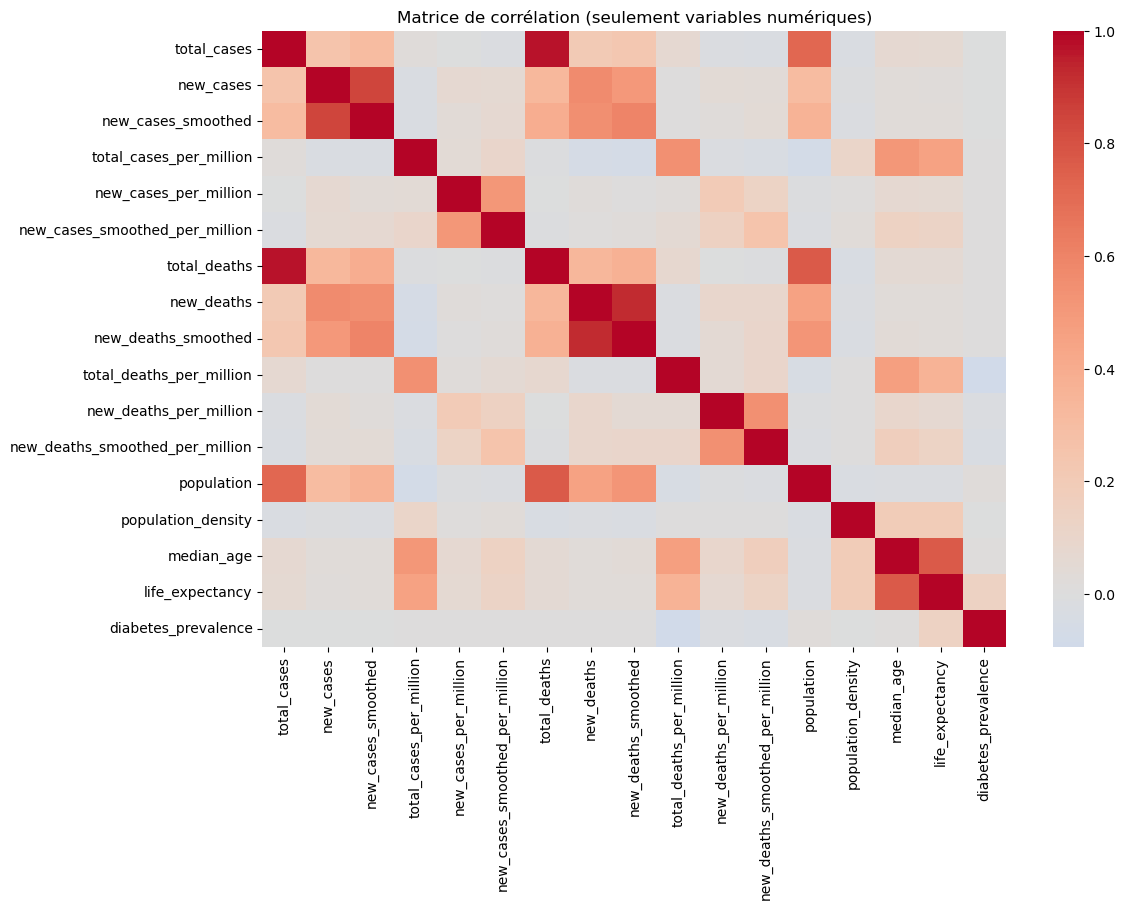


--- Distribution de country ---
country
Ecuador      2081
Germany      2081
Bulgaria     2081
Slovenia     2081
Lithuania    2081
Name: count, dtype: int64

--- Distribution de date ---
date
2022-07-31    261
2022-06-30    260
2022-10-30    260
2022-10-16    260
2022-04-24    260
Name: count, dtype: int64

--- Distribution de code ---
code
FIN    2081
EST    2081
GRC    2081
DEU    2081
SVK    2081
Name: count, dtype: int64

--- Distribution de continent ---
continent
Africa           116743
Europe           105915
Asia             101458
North America     84735
Oceania           49518
Name: count, dtype: int64


In [19]:
# 1. Aperçu global
print("Shape du dataset:", df.shape)
print("\nTypes de variables:\n", df.dtypes.value_counts())
print("\nColonnes catégorielles:", df.select_dtypes(include="object").columns.tolist())
print("\nColonnes numériques:", df.select_dtypes(include=["int64","float64"]).columns.tolist()[:15], "...")

# 2. Statistiques descriptives globales
print("\nStatistiques descriptives numériques:")
print(df.describe().T)
print("\nStatistiques descriptives catégorielles:")
print(df.describe(include=["object"]).T)

# 3. Matrice de corrélation (uniquement variables numériques)
df_num = df.select_dtypes(include=["int64","float64"]).dropna(axis=1, thresh=len(df)*0.8)  
# garde seulement les colonnes numériques avec <20% de valeurs manquantes

corr_matrix = df_num.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, cbar=True)
plt.title("Matrice de corrélation (seulement variables numériques)")
plt.show()

# 4. Aperçu des variables catégorielles (fréquences)
for col in df.select_dtypes(include="object").columns:
    print(f"\n--- Distribution de {col} ---")
    print(df[col].value_counts().head())

In [20]:
# Construire tableau récapitulatif
summary = pd.DataFrame({
    "colonne": df.columns,
    "type": df.dtypes.values,
    "categorie": [
        "temporel" if str(dtype)=="datetime64[ns]" else 
        "catégoriel" if str(dtype)=="object" else 
        "numérique"
        for dtype in df.dtypes.values
    ],
    "%_NaN": df.isna().mean().values * 100
})

# Trier par % de NaN décroissant
summary_sorted = summary.sort_values(by="%_NaN", ascending=False)

# Afficher les colonnes avec beaucoup de NaN (>50%)
print("Colonnes avec beaucoup de NaN (>50%) :")
print(summary_sorted[summary_sorted["%_NaN"] > 50])

# Aperçu du résumé complet
print("\nRésumé global (5 premières lignes) :")
print(summary_sorted.head())

# Sauvegarde en CSV pour inspection complète
summary_sorted.to_csv("resume_dataset.csv", index=False)


Colonnes avec beaucoup de NaN (>50%) :
                                       colonne     type  categorie       %_NaN
60                     human_development_index  float64  numérique  100.000000
24                       weekly_icu_admissions  float64  numérique   97.913967
25           weekly_icu_admissions_per_million  float64  numérique   97.913967
17     excess_mortality_cumulative_per_million  float64  numérique   97.412051
16        excess_mortality_cumulative_absolute  float64  numérique   97.405599
15                 excess_mortality_cumulative  float64  numérique   97.405599
14                            excess_mortality  float64  numérique   97.405599
21          weekly_hosp_admissions_per_million  float64  numérique   95.351445
20                      weekly_hosp_admissions  float64  numérique   95.351445
23                    icu_patients_per_million  float64  numérique   92.577341
22                                icu_patients  float64  numérique   92.577341
18           

In [13]:
missing = df.isna().mean().sort_values(ascending=False)
print("\nValeurs manquantes (%):")
print(missing.head(20))


Valeurs manquantes (%):
human_development_index                    1.000000
weekly_icu_admissions                      0.979140
weekly_icu_admissions_per_million          0.979140
excess_mortality_cumulative_per_million    0.974121
excess_mortality_cumulative_absolute       0.974056
excess_mortality_cumulative                0.974056
excess_mortality                           0.974056
weekly_hosp_admissions_per_million         0.953514
weekly_hosp_admissions                     0.953514
icu_patients_per_million                   0.925773
icu_patients                               0.925773
hosp_patients                              0.922851
hosp_patients_per_million                  0.922851
total_boosters                             0.888451
total_boosters_per_hundred                 0.888451
new_vaccinations                           0.869301
new_tests                                  0.856915
new_tests_per_thousand                     0.856915
people_fully_vaccinated                

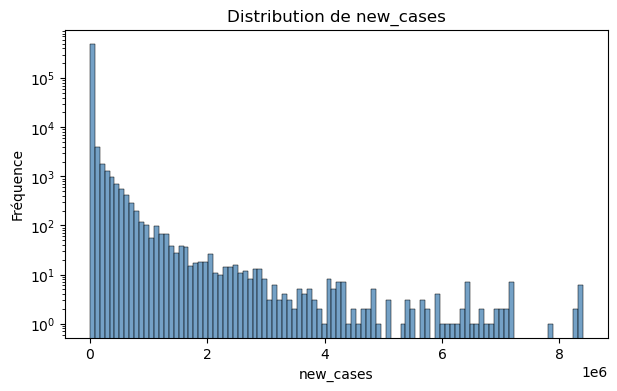

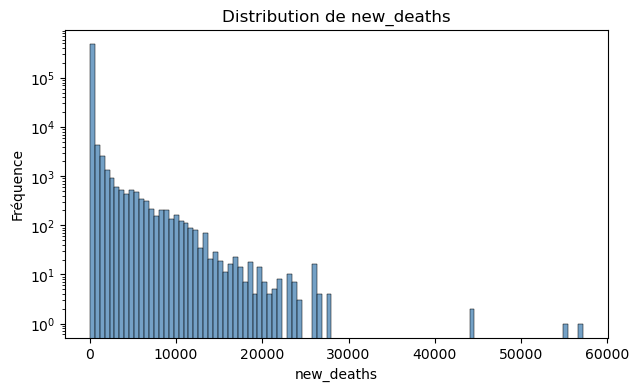

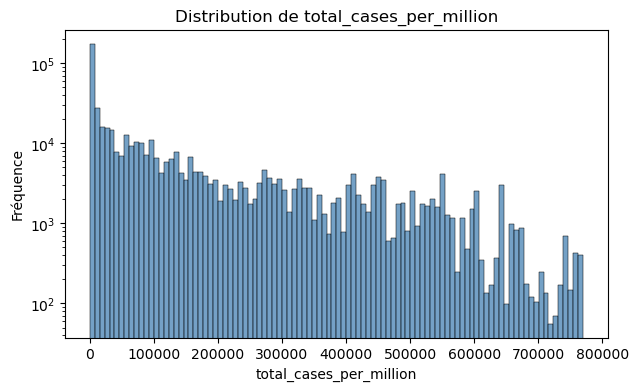

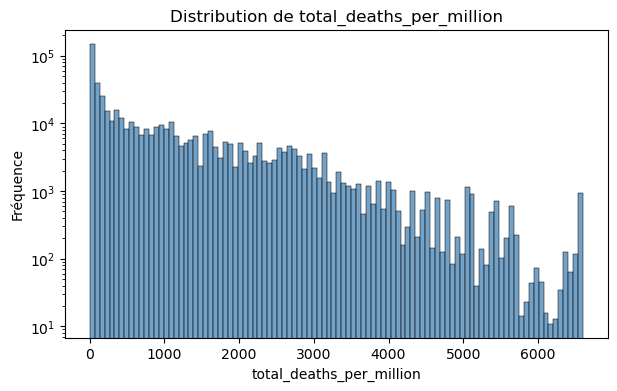

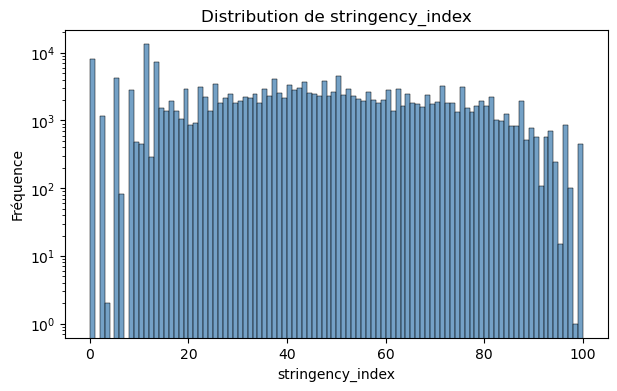

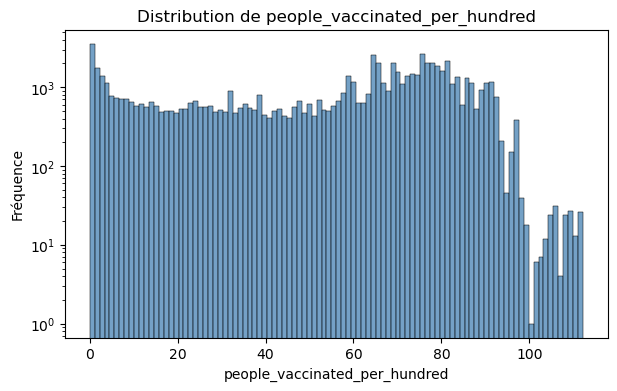

In [21]:

# Sélection de variables importantes
variables = ["new_cases", "new_deaths", 
             "total_cases_per_million", "total_deaths_per_million", 
             "stringency_index", "people_vaccinated_per_hundred"]

# Histogrammes
for var in variables:
    plt.figure(figsize=(7,4))
    sns.histplot(df[var].dropna(), bins=100, kde=False, color="steelblue")
    plt.title(f"Distribution de {var}")
    plt.xlabel(var)
    plt.ylabel("Fréquence")
    plt.yscale("log")   # mettre l'axe Y en log pour mieux voir
    plt.show()


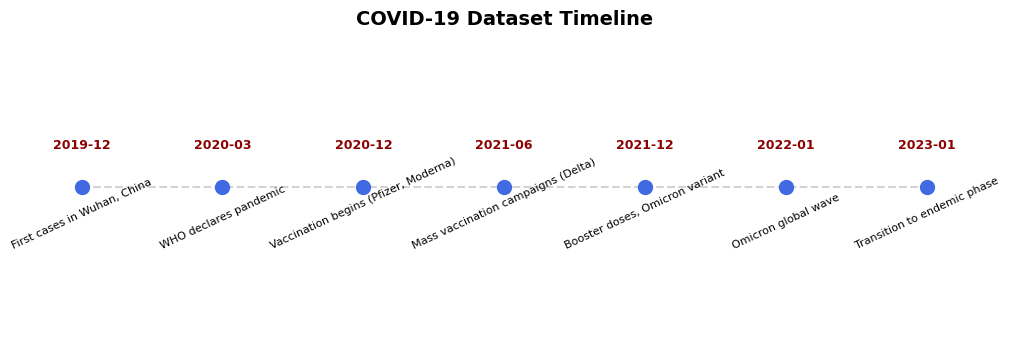

In [22]:
# Key dates and events
dates = ["2019-12", "2020-03", "2020-12", "2021-06", "2021-12", "2022-01", "2023-01"]
events = [
    "First cases in Wuhan, China",
    "WHO declares pandemic",
    "Vaccination begins (Pfizer, Moderna)",
    "Mass vaccination campaigns (Delta)",
    "Booster doses, Omicron variant",
    "Omicron global wave",
    "Transition to endemic phase"
]

# Position for the timeline
x = list(range(len(dates)))

# Plot the timeline
plt.figure(figsize=(12,4))
plt.hlines(1, 0, len(dates)-1, colors="lightgray", linestyles="dashed")

# Add points
plt.plot(x, [1]*len(dates), "o", color="royalblue", markersize=10)

# Annotate with dates and events
for i, (d, e) in enumerate(zip(dates, events)):
    plt.text(i, 1.05, d, ha="center", fontsize=9, fontweight="bold", color="darkred")
    plt.text(i, 0.92, e, ha="center", fontsize=8, rotation=25)

# Clean up the plot
plt.ylim(0.8, 1.2)
plt.axis("off")
plt.title("COVID-19 Dataset Timeline", fontsize=14, fontweight="bold")
plt.show()


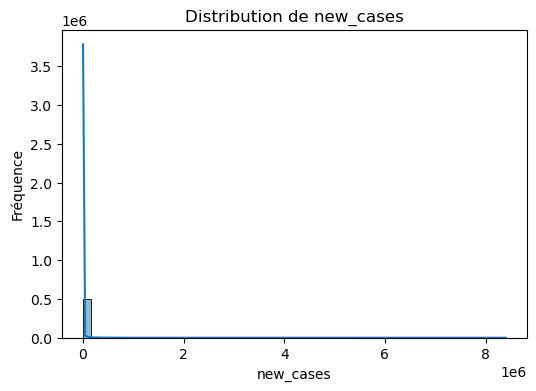

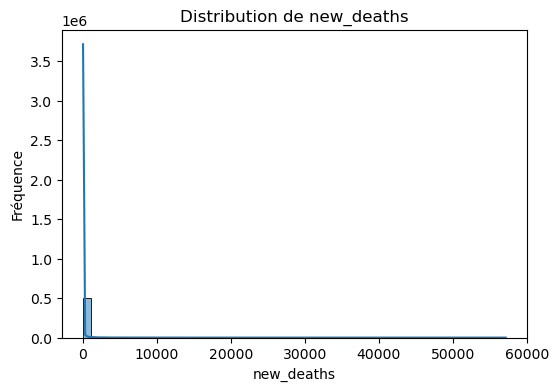

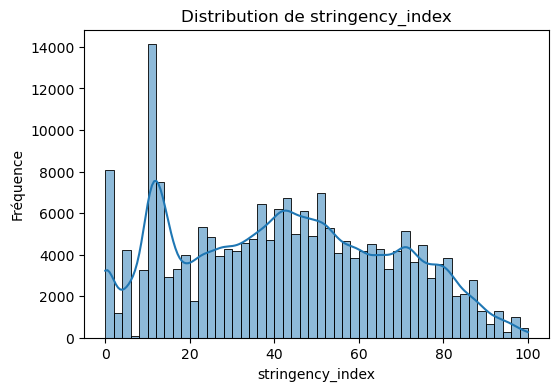

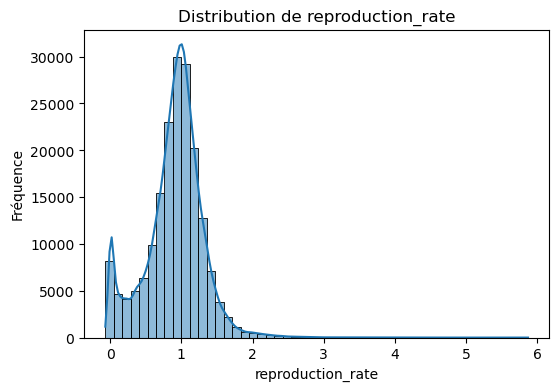

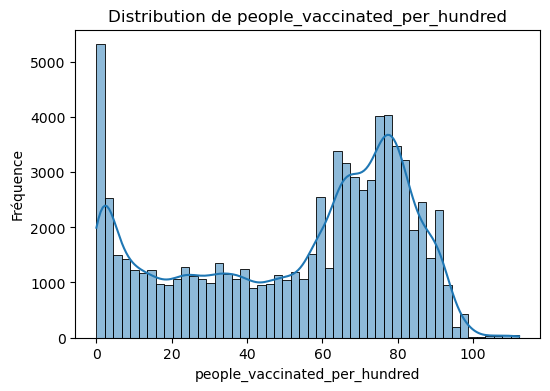

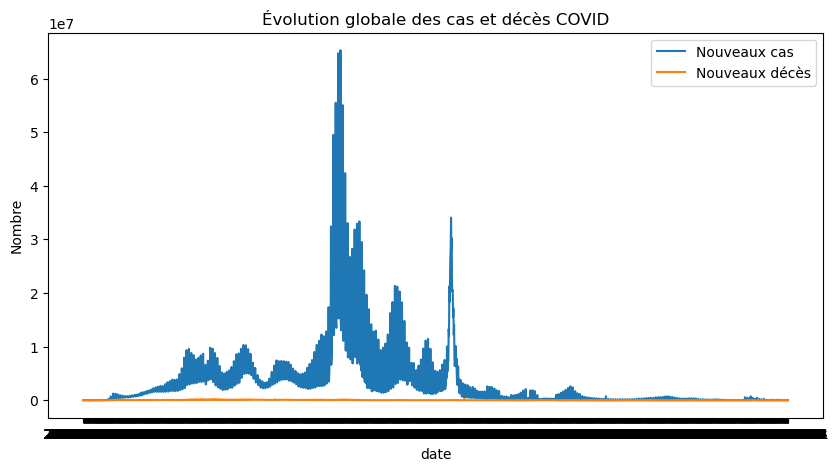

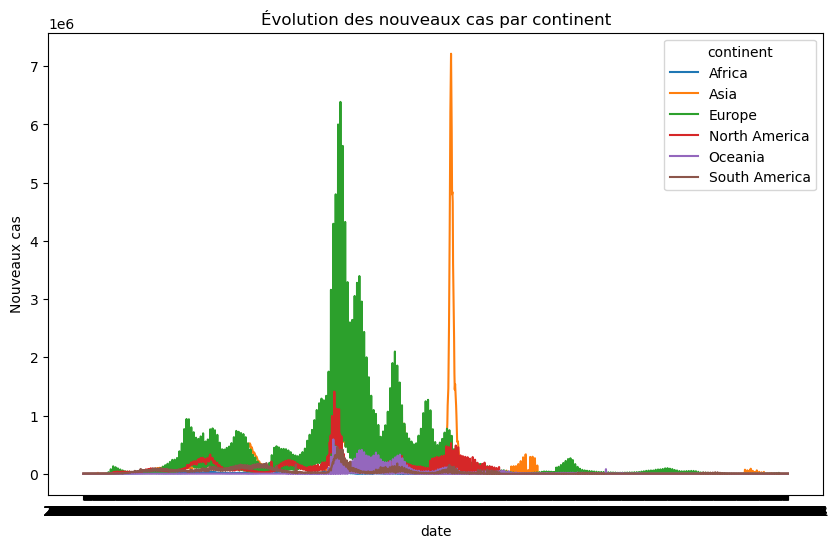

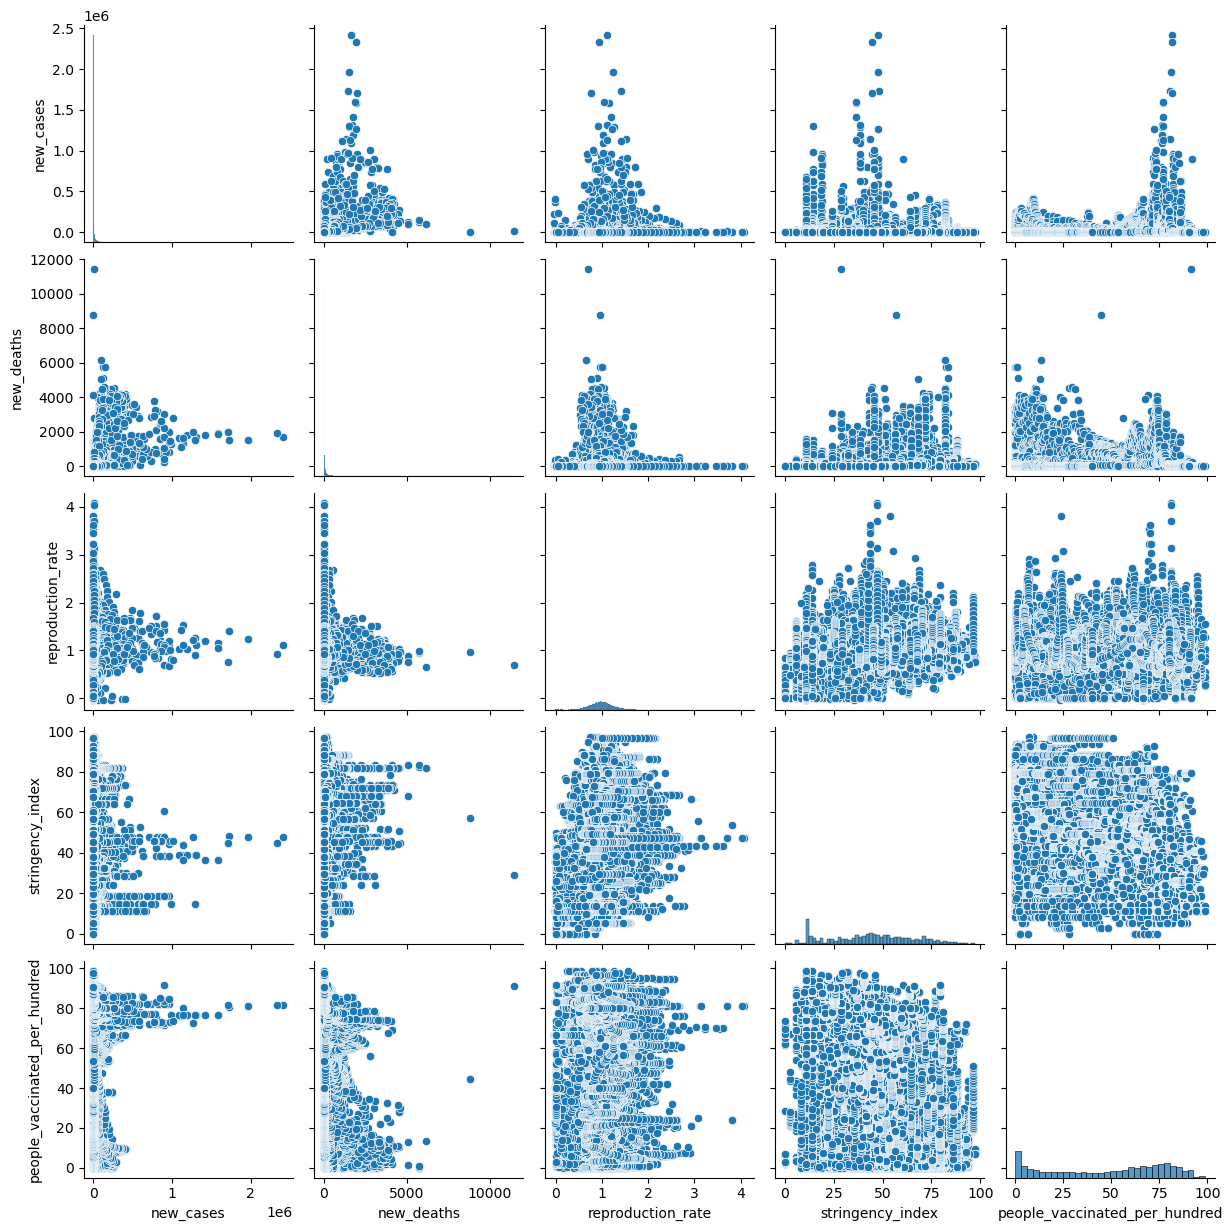

In [14]:
# =====================================================
# 3. Distribution des variables clés
# =====================================================
variables = ["new_cases", "new_deaths", "stringency_index",
             "reproduction_rate", "people_vaccinated_per_hundred"]

for var in variables:
    plt.figure(figsize=(6,4))
    sns.histplot(df[var].dropna(), kde=True, bins=50)
    plt.title(f"Distribution de {var}")
    plt.xlabel(var)
    plt.ylabel("Fréquence")
    plt.show()

# =====================================================
# 4. Évolution temporelle mondiale
# =====================================================
df_world = df.groupby("date")[["new_cases","new_deaths"]].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=df_world, x="date", y="new_cases", label="Nouveaux cas")
sns.lineplot(data=df_world, x="date", y="new_deaths", label="Nouveaux décès")
plt.title("Évolution globale des cas et décès COVID")
plt.ylabel("Nombre")
plt.legend()
plt.show()

# =====================================================
# 5. Comparaison par continent
# =====================================================
df_cont = df.groupby(["continent","date"])[["new_cases"]].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=df_cont, x="date", y="new_cases", hue="continent")
plt.title("Évolution des nouveaux cas par continent")
plt.ylabel("Nouveaux cas")
plt.show()

# =====================================================
# 6. Relations entre variables
# =====================================================
sns.pairplot(df[["new_cases","new_deaths","reproduction_rate",
                 "stringency_index","people_vaccinated_per_hundred"]].dropna())
plt.show()


=== PRÉPARATION DES DONNÉES ===
Dataset pays créé: (262, 18)
Valeurs manquantes par colonne:
country                                  0
total_cases_per_million                 13
total_deaths_per_million                13
new_cases_smoothed_per_million          13
new_deaths_smoothed_per_million         13
stringency_index                        77
reproduction_rate                       65
positive_rate                           82
people_fully_vaccinated_per_hundred     35
total_boosters_per_hundred              42
population                              13
population_density                      17
median_age                              16
life_expectancy                         15
gdp_per_capita                          62
diabetes_prevalence                     46
hospital_beds_per_thousand             108
continent                               23
dtype: int64

=== ANALYSES NON SUPERVISÉES ===


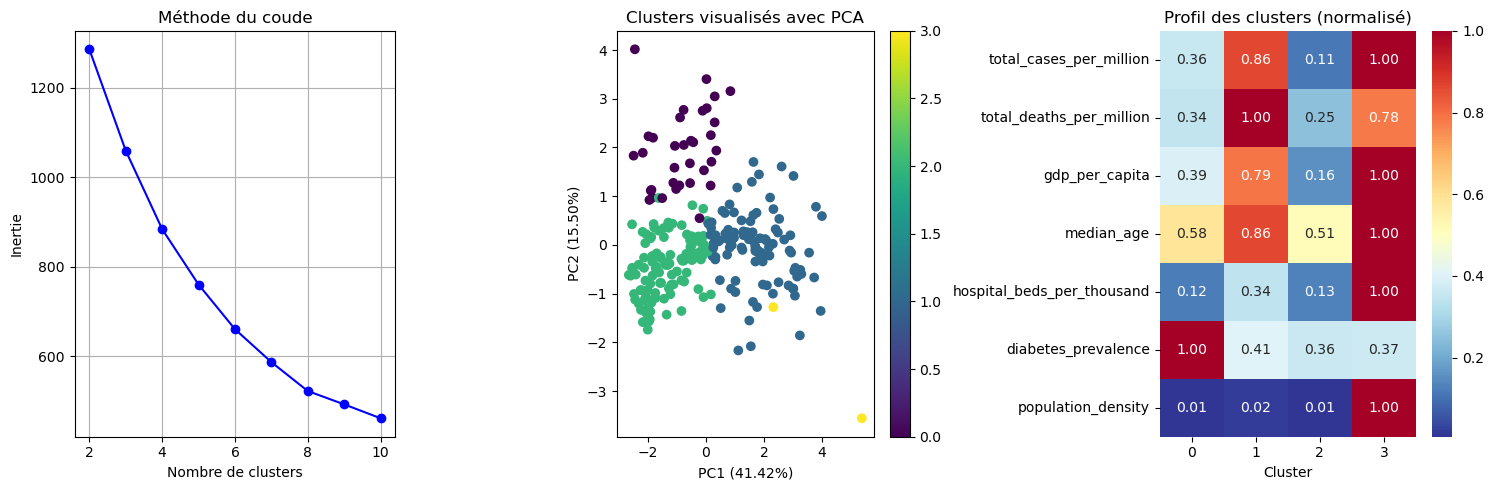


Répartition des pays par cluster:
cluster
0     34
1    106
2    120
3      2
Name: count, dtype: int64

Profil moyen des clusters:

--- Cluster 0 ---
Pays: ['American Samoa', 'Bangladesh', 'Belize', 'Egypt', 'Fiji', 'French Polynesia', 'Guam', 'Jordan', 'Kiribati', 'Kuwait']...
Caractéristiques moyennes:
  total_cases_per_million: 158012.54
  total_deaths_per_million: 761.61
  gdp_per_capita: 20361.45
  median_age: 27.14
  hospital_beds_per_thousand: 1.69
  diabetes_prevalence: 18.89
  population_density: 186.32

--- Cluster 1 ---
Pays: ['Andorra', 'Anguilla', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Barbados']...
Caractéristiques moyennes:
  total_cases_per_million: 380728.45
  total_deaths_per_million: 2209.20
  gdp_per_capita: 40921.13
  median_age: 39.95
  hospital_beds_per_thousand: 4.71
  diabetes_prevalence: 7.65
  population_density: 409.84

--- Cluster 2 ---
Pays: ['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Angola', 'Antigua and Ba

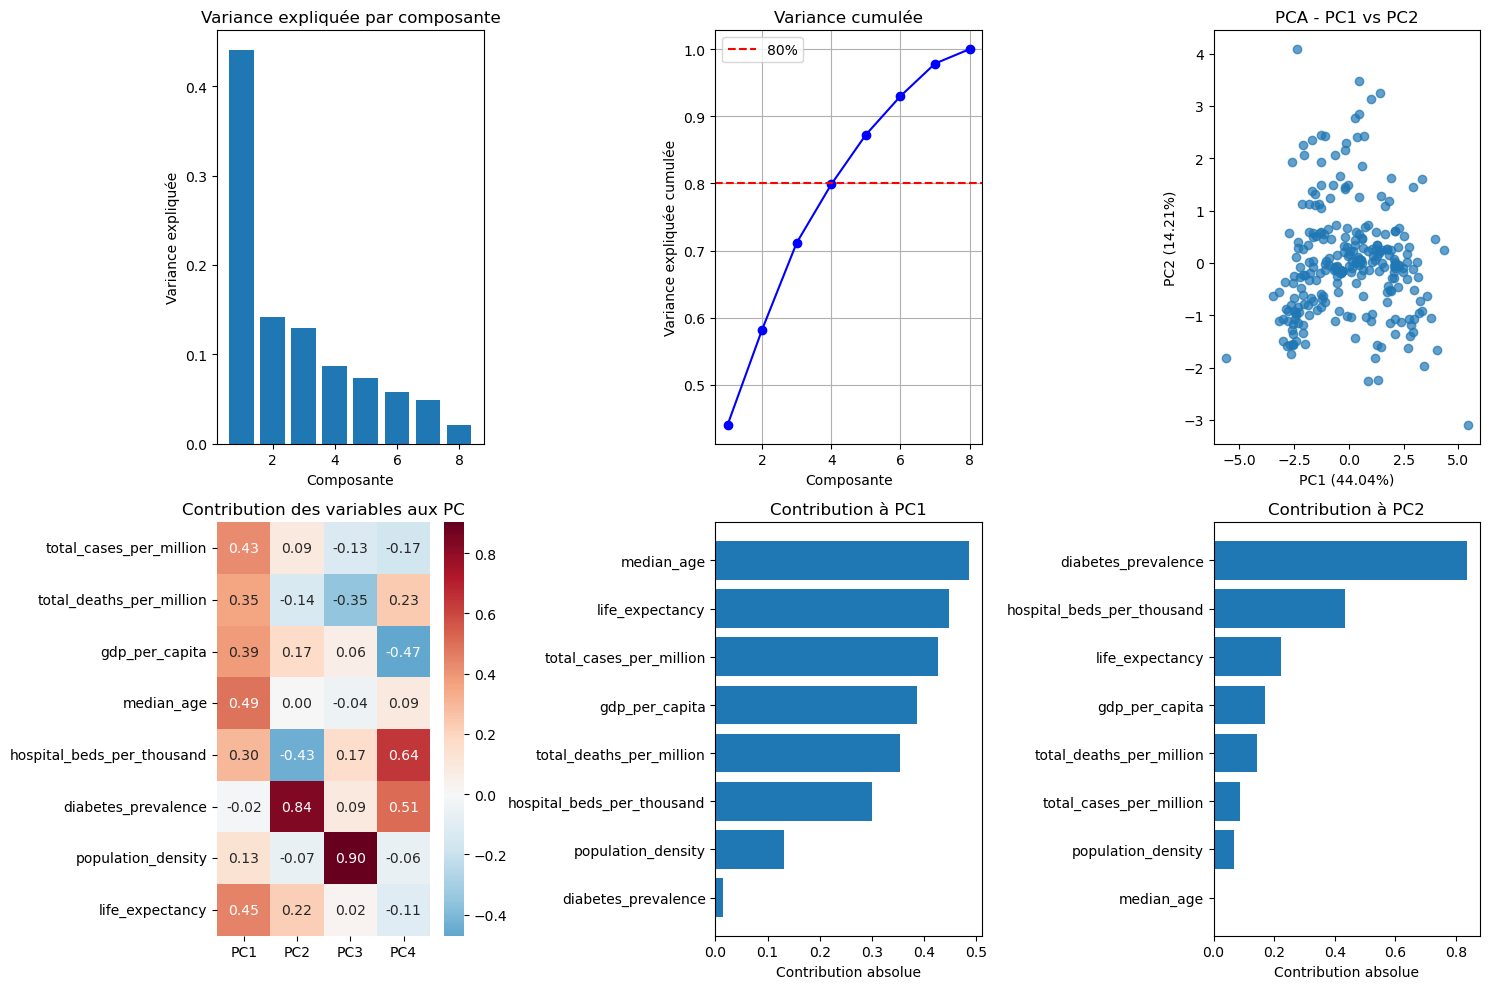


=== INTERPRÉTATION PCA ===
Variance expliquée par les 3 premières composantes: 71.17%

--- PC1 (44.04% de variance) ---
Variables les plus contributives:
  median_age: 0.486
  life_expectancy: 0.447
  total_cases_per_million: 0.427

--- PC2 (14.21% de variance) ---
Variables les plus contributives:
  diabetes_prevalence: 0.837
  hospital_beds_per_thousand: -0.435
  life_expectancy: 0.221

--- PC3 (12.93% de variance) ---
Variables les plus contributives:
  population_density: 0.902
  total_deaths_per_million: -0.354
  hospital_beds_per_thousand: 0.166

=== ANALYSES SUPERVISÉES ===

--- PRÉDICTION DU TAUX DE MORTALITÉ ---
Données disponibles pour le modèle: 146 pays

Linear Regression:
  MSE: 1155820.52
  R²: 0.581

Random Forest:
  MSE: 797326.13
  R²: 0.711

Importance des variables (Random Forest):
  total_cases_per_million: 0.336
  median_age: 0.254
  gdp_per_capita: 0.092
  diabetes_prevalence: 0.090
  hospital_beds_per_thousand: 0.083
  life_expectancy: 0.083
  population_density

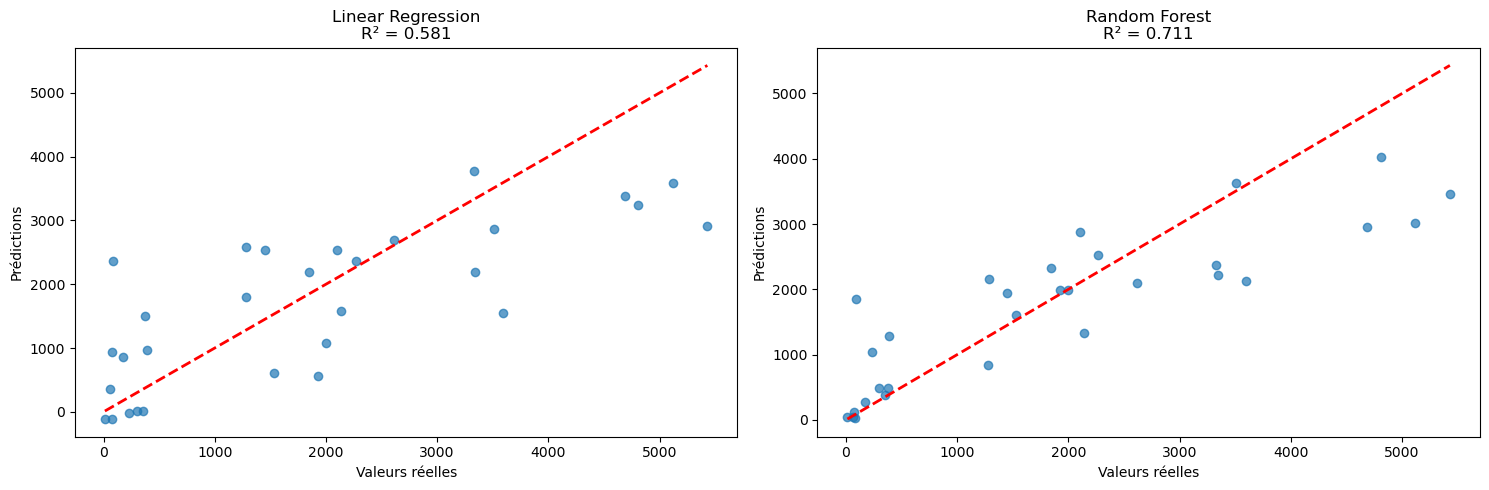


--- CLASSIFICATION NIVEAU D'IMPACT COVID ---
Distribution des niveaux d'impact:
impact_level
0    82
1    82
2    85
Name: count, dtype: int64

Logistic Regression:
Classification Report:
              precision    recall  f1-score   support

      Faible       0.88      0.78      0.82         9
       Moyen       0.58      0.58      0.58        12
        Fort       0.60      0.67      0.63         9

    accuracy                           0.67        30
   macro avg       0.69      0.68      0.68        30
weighted avg       0.68      0.67      0.67        30


Random Forest:
Classification Report:
              precision    recall  f1-score   support

      Faible       0.88      0.78      0.82         9
       Moyen       0.67      0.83      0.74        12
        Fort       0.86      0.67      0.75         9

    accuracy                           0.77        30
   macro avg       0.80      0.76      0.77        30
weighted avg       0.79      0.77      0.77        30



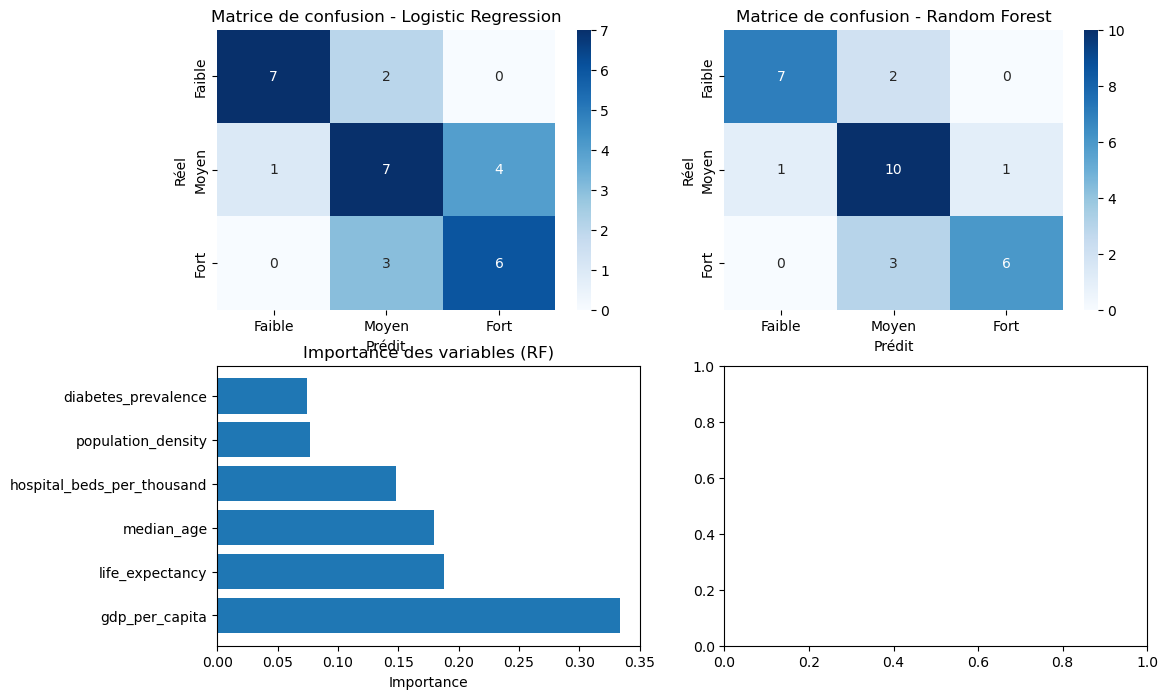

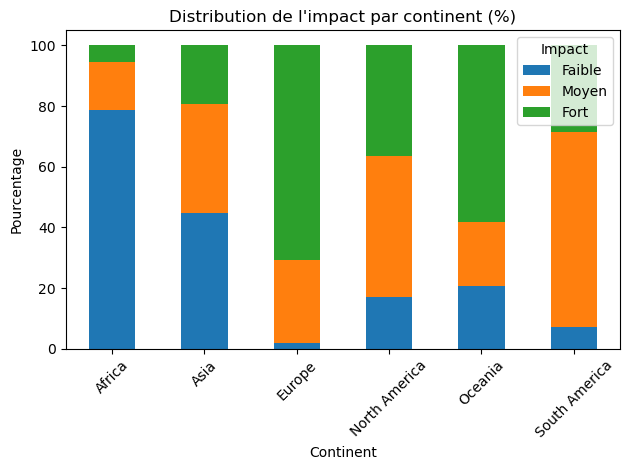


--- ANALYSE TEMPORELLE ---


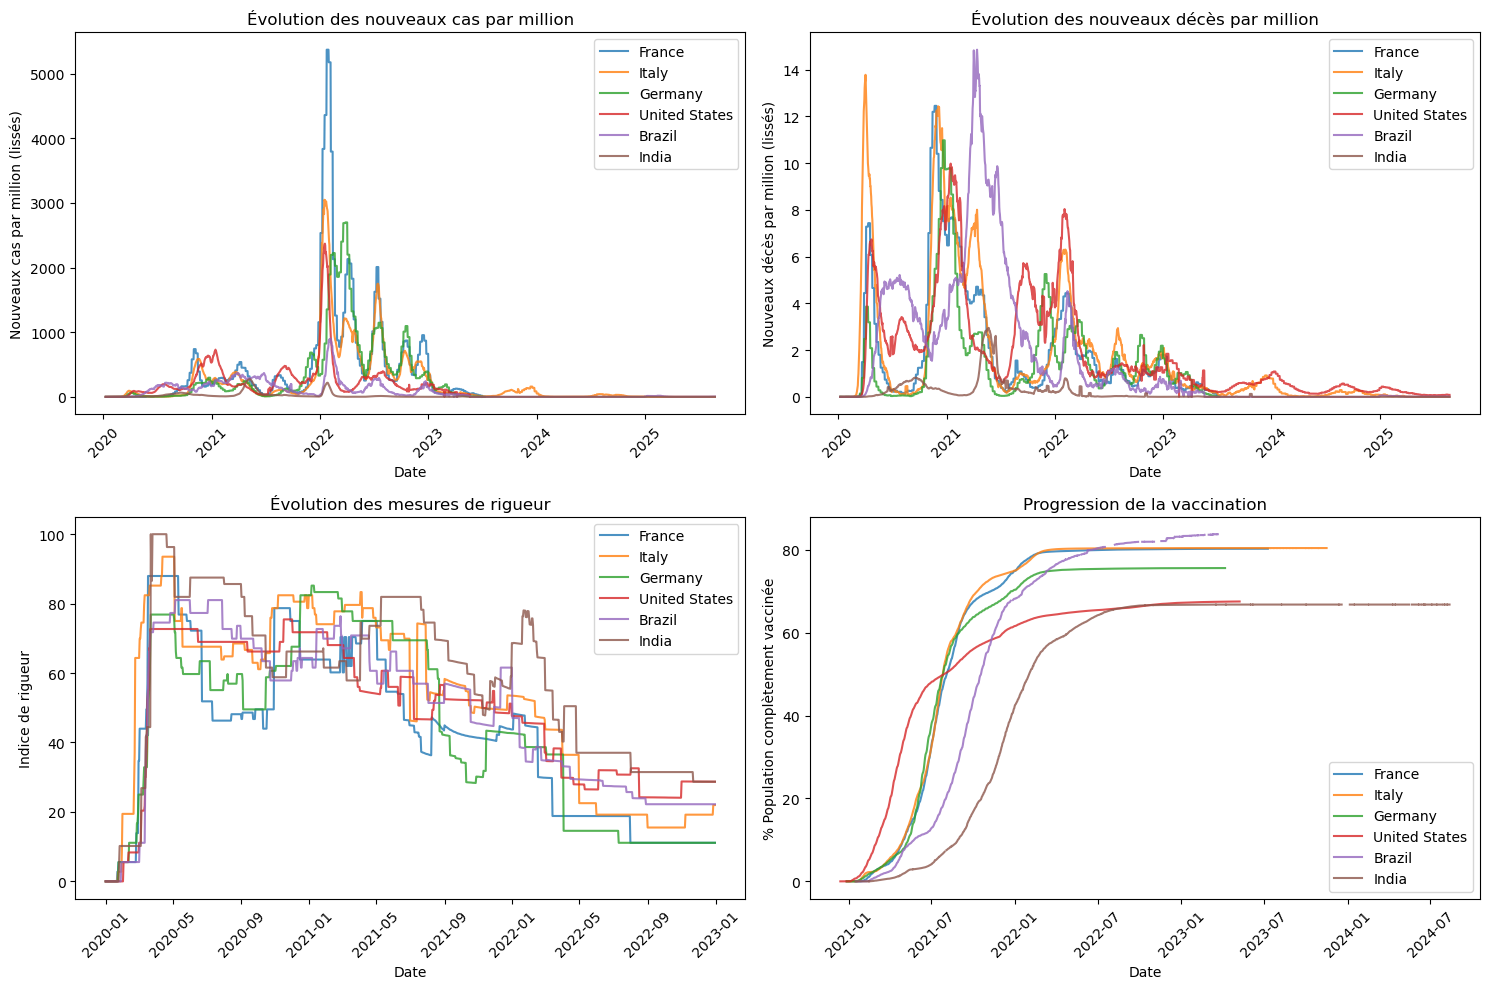


=== RÉSUMÉ DES ANALYSES ===
✓ Clustering des pays réalisé
✓ Analyse PCA détaillée terminée
✓ Prédiction du taux de mortalité effectuée
✓ Classification de l'impact COVID réalisée
✓ Analyse temporelle sur échantillon terminée

Toutes les analyses supervisées et non supervisées ont été complétées!


In [25]:
print("=== PRÉPARATION DES DONNÉES ===")

# Conversion de la colonne date en datetime
df['date'] = pd.to_datetime(df['date'])

# Création d'un dataset agrégé par pays pour les analyses non supervisées
def create_country_aggregated_data(df):
    """Crée un dataset agrégé par pays avec les moyennes/max des indicateurs"""
    
    # Variables d'intérêt pour l'agrégation
    agg_vars = {
        # Variables épidémiologiques (max pour les totaux, moyenne pour les taux)
        'total_cases_per_million': 'max',
        'total_deaths_per_million': 'max',
        'new_cases_smoothed_per_million': 'mean',
        'new_deaths_smoothed_per_million': 'mean',
        
        # Variables de santé publique
        'stringency_index': 'mean',
        'reproduction_rate': 'mean',
        'positive_rate': 'mean',
        
        # Variables de vaccination
        'people_fully_vaccinated_per_hundred': 'max',
        'total_boosters_per_hundred': 'max',
        
        # Variables socio-économiques et démographiques (constantes par pays)
        'population': 'first',
        'population_density': 'first',
        'median_age': 'first',
        'life_expectancy': 'first',
        'gdp_per_capita': 'first',
        'diabetes_prevalence': 'first',
        'hospital_beds_per_thousand': 'first'
    }
    
    # Agrégation par pays
    country_df = df.groupby('country').agg(agg_vars).reset_index()
    
    # Ajout du continent
    continent_mapping = df.groupby('country')['continent'].first().to_dict()
    country_df['continent'] = country_df['country'].map(continent_mapping)
    
    return country_df

# Création du dataset pays
country_data = create_country_aggregated_data(df)
print(f"Dataset pays créé: {country_data.shape}")
print(f"Valeurs manquantes par colonne:\n{country_data.isnull().sum()}")

print("\n=== ANALYSES NON SUPERVISÉES ===")

# 1. CLUSTERING DES PAYS
def perform_clustering_analysis(data):
    """Effectue une analyse de clustering sur les données pays"""
    
    # Sélection des variables pour le clustering
    cluster_vars = [
        'total_cases_per_million', 'total_deaths_per_million',
        'gdp_per_capita', 'median_age', 'hospital_beds_per_thousand',
        'diabetes_prevalence', 'population_density'
    ]
    
    # Préparation des données
    cluster_data = data[cluster_vars].copy()
    
    # Imputation des valeurs manquantes
    imputer = SimpleImputer(strategy='median')
    cluster_data_imputed = imputer.fit_transform(cluster_data)
    
    # Standardisation
    scaler = StandardScaler()
    cluster_data_scaled = scaler.fit_transform(cluster_data_imputed)
    
    # Méthode du coude pour déterminer le nombre optimal de clusters
    inertias = []
    K_range = range(2, 11)
    
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(cluster_data_scaled)
        inertias.append(kmeans.inertia_)
    
    # Graphique du coude
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.plot(K_range, inertias, 'bo-')
    plt.xlabel('Nombre de clusters')
    plt.ylabel('Inertie')
    plt.title('Méthode du coude')
    plt.grid(True)
    
    # Clustering avec k=4 (généralement bon compromis)
    n_clusters = 4
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(cluster_data_scaled)
    
    # Ajout des labels au dataset
    data_with_clusters = data.copy()
    data_with_clusters['cluster'] = cluster_labels
    
    # PCA pour visualisation
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(cluster_data_scaled)
    
    plt.subplot(1, 3, 2)
    scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
    plt.title('Clusters visualisés avec PCA')
    plt.colorbar(scatter)
    
    # Analyse des clusters
    plt.subplot(1, 3, 3)
    cluster_summary = data_with_clusters.groupby('cluster')[cluster_vars].mean()
    cluster_summary_norm = cluster_summary.div(cluster_summary.max(), axis=1)
    
    sns.heatmap(cluster_summary_norm.T, annot=True, fmt='.2f', cmap='RdYlBu_r')
    plt.title('Profil des clusters (normalisé)')
    plt.xlabel('Cluster')
    
    plt.tight_layout()
    plt.show()
    
    # Statistiques des clusters
    print("\nRépartition des pays par cluster:")
    print(data_with_clusters['cluster'].value_counts().sort_index())
    
    print("\nProfil moyen des clusters:")
    for i in range(n_clusters):
        print(f"\n--- Cluster {i} ---")
        cluster_countries = data_with_clusters[data_with_clusters['cluster'] == i]['country'].tolist()
        print(f"Pays: {cluster_countries[:10]}..." if len(cluster_countries) > 10 else f"Pays: {cluster_countries}")
        print(f"Caractéristiques moyennes:")
        for var in cluster_vars:
            mean_val = data_with_clusters[data_with_clusters['cluster'] == i][var].mean()
            print(f"  {var}: {mean_val:.2f}")
    
    return data_with_clusters, cluster_labels, pca_data

# Exécution de l'analyse de clustering
country_clustered, clusters, pca_coords = perform_clustering_analysis(country_data)

# 2. ANALYSE EN COMPOSANTES PRINCIPALES DÉTAILLÉE
def detailed_pca_analysis(data):
    """Analyse PCA détaillée"""
    
    # Variables pour PCA
    pca_vars = [
        'total_cases_per_million', 'total_deaths_per_million',
        'gdp_per_capita', 'median_age', 'hospital_beds_per_thousand',
        'diabetes_prevalence', 'population_density', 'life_expectancy'
    ]
    
    pca_data = data[pca_vars].copy()
    
    # Imputation et standardisation
    imputer = SimpleImputer(strategy='median')
    pca_data_imputed = imputer.fit_transform(pca_data)
    
    scaler = StandardScaler()
    pca_data_scaled = scaler.fit_transform(pca_data_imputed)
    
    # PCA
    pca = PCA()
    pca_result = pca.fit_transform(pca_data_scaled)
    
    # Graphiques PCA
    plt.figure(figsize=(15, 10))
    
    # Variance expliquée
    plt.subplot(2, 3, 1)
    plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
    plt.xlabel('Composante')
    plt.ylabel('Variance expliquée')
    plt.title('Variance expliquée par composante')
    
    # Variance expliquée cumulée
    plt.subplot(2, 3, 2)
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
             np.cumsum(pca.explained_variance_ratio_), 'bo-')
    plt.axhline(y=0.8, color='r', linestyle='--', label='80%')
    plt.xlabel('Composante')
    plt.ylabel('Variance expliquée cumulée')
    plt.title('Variance cumulée')
    plt.legend()
    plt.grid(True)
    
    # Biplot PC1 vs PC2
    plt.subplot(2, 3, 3)
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
    plt.title('PCA - PC1 vs PC2')
    
    # Contribution des variables aux composantes
    plt.subplot(2, 3, 4)
    components_df = pd.DataFrame(
        pca.components_[:4].T,
        columns=[f'PC{i+1}' for i in range(4)],
        index=pca_vars
    )
    sns.heatmap(components_df, annot=True, fmt='.2f', cmap='RdBu_r', center=0)
    plt.title('Contribution des variables aux PC')
    
    # Top variables pour PC1
    plt.subplot(2, 3, 5)
    pc1_contrib = pd.DataFrame({
        'Variable': pca_vars,
        'Contribution': np.abs(pca.components_[0])
    }).sort_values('Contribution', ascending=True)
    
    plt.barh(pc1_contrib['Variable'], pc1_contrib['Contribution'])
    plt.title('Contribution à PC1')
    plt.xlabel('Contribution absolue')
    
    # Top variables pour PC2
    plt.subplot(2, 3, 6)
    pc2_contrib = pd.DataFrame({
        'Variable': pca_vars,
        'Contribution': np.abs(pca.components_[1])
    }).sort_values('Contribution', ascending=True)
    
    plt.barh(pc2_contrib['Variable'], pc2_contrib['Contribution'])
    plt.title('Contribution à PC2')
    plt.xlabel('Contribution absolue')
    
    plt.tight_layout()
    plt.show()
    
    # Interprétation des composantes
    print("\n=== INTERPRÉTATION PCA ===")
    print(f"Variance expliquée par les 3 premières composantes: {np.sum(pca.explained_variance_ratio_[:3]):.2%}")
    
    for i in range(3):
        print(f"\n--- PC{i+1} ({pca.explained_variance_ratio_[i]:.2%} de variance) ---")
        pc_loadings = pd.DataFrame({
            'Variable': pca_vars,
            'Loading': pca.components_[i]
        }).sort_values('Loading', key=abs, ascending=False)
        
        print("Variables les plus contributives:")
        for _, row in pc_loadings.head(3).iterrows():
            print(f"  {row['Variable']}: {row['Loading']:.3f}")

# Exécution de l'analyse PCA détaillée
detailed_pca_analysis(country_data)

print("\n=== ANALYSES SUPERVISÉES ===")

# 3. PRÉDICTION DU TAUX DE MORTALITÉ (RÉGRESSION)
def mortality_prediction_analysis(data):
    """Analyse de prédiction du taux de mortalité"""
    
    print("\n--- PRÉDICTION DU TAUX DE MORTALITÉ ---")
    
    # Variables prédictives
    feature_cols = [
        'gdp_per_capita', 'median_age', 'diabetes_prevalence',
        'hospital_beds_per_thousand', 'population_density',
        'life_expectancy', 'total_cases_per_million'
    ]
    
    target_col = 'total_deaths_per_million'
    
    # Préparation des données
    model_data = data[feature_cols + [target_col]].copy()
    model_data = model_data.dropna()
    
    print(f"Données disponibles pour le modèle: {len(model_data)} pays")
    
    X = model_data[feature_cols]
    y = model_data[target_col]
    
    # Division train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Standardisation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Modèles
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
    }
    
    results = {}
    
    plt.figure(figsize=(15, 5))
    
    for i, (name, model) in enumerate(models.items()):
        # Entraînement
        if name == 'Linear Regression':
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        # Métriques
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results[name] = {'MSE': mse, 'R2': r2}
        
        print(f"\n{name}:")
        print(f"  MSE: {mse:.2f}")
        print(f"  R²: {r2:.3f}")
        
        # Graphique prédictions vs réalité
        plt.subplot(1, len(models), i+1)
        plt.scatter(y_test, y_pred, alpha=0.7)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.xlabel('Valeurs réelles')
        plt.ylabel('Prédictions')
        plt.title(f'{name}\nR² = {r2:.3f}')
        
        # Feature importance pour Random Forest
        if name == 'Random Forest':
            feature_importance = pd.DataFrame({
                'Feature': feature_cols,
                'Importance': model.feature_importances_
            }).sort_values('Importance', ascending=False)
            
            print(f"\nImportance des variables ({name}):")
            for _, row in feature_importance.iterrows():
                print(f"  {row['Feature']}: {row['Importance']:.3f}")
    
    plt.tight_layout()
    plt.show()
    
    return results

# Exécution de l'analyse de prédiction de mortalité
mortality_results = mortality_prediction_analysis(country_data)

# 4. CLASSIFICATION: PRÉDICTION DU NIVEAU D'IMPACT COVID
def impact_classification_analysis(data):
    """Classification des pays selon l'impact COVID"""
    
    print("\n--- CLASSIFICATION NIVEAU D'IMPACT COVID ---")
    
    # Création de la variable cible : niveau d'impact basé sur les cas par million
    data = data.copy()
    data = data.dropna(subset=['total_cases_per_million'])
    
    # Définition des seuils (quartiles)
    q33 = data['total_cases_per_million'].quantile(0.33)
    q66 = data['total_cases_per_million'].quantile(0.66)
    
    def categorize_impact(cases_per_million):
        if cases_per_million <= q33:
            return 0  # Faible impact
        elif cases_per_million <= q66:
            return 1  # Impact moyen
        else:
            return 2  # Fort impact
    
    data['impact_level'] = data['total_cases_per_million'].apply(categorize_impact)
    
    print(f"Distribution des niveaux d'impact:")
    print(data['impact_level'].value_counts().sort_index())
    
    # Variables prédictives
    feature_cols = [
        'gdp_per_capita', 'median_age', 'diabetes_prevalence',
        'hospital_beds_per_thousand', 'population_density',
        'life_expectancy'
    ]
    
    # Préparation des données
    model_data = data[feature_cols + ['impact_level']].copy()
    model_data = model_data.dropna()
    
    X = model_data[feature_cols]
    y = model_data['impact_level']
    
    # Division train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Standardisation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Modèles
    models = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
    }
    
    plt.figure(figsize=(12, 8))
    
    for i, (name, model) in enumerate(models.items()):
        # Entraînement
        if name == 'Logistic Regression':
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        print(f"\n{name}:")
        print("Classification Report:")
        print(classification_report(y_test, y_pred, 
                                   target_names=['Faible', 'Moyen', 'Fort']))
        
        # Matrice de confusion
        plt.subplot(2, 2, i+1)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Faible', 'Moyen', 'Fort'],
                   yticklabels=['Faible', 'Moyen', 'Fort'])
        plt.title(f'Matrice de confusion - {name}')
        plt.ylabel('Réel')
        plt.xlabel('Prédit')
        
        # Feature importance pour Random Forest
        if name == 'Random Forest':
            feature_importance = pd.DataFrame({
                'Feature': feature_cols,
                'Importance': model.feature_importances_
            }).sort_values('Importance', ascending=False)
            
            plt.subplot(2, 2, 3)
            plt.barh(feature_importance['Feature'], feature_importance['Importance'])
            plt.title('Importance des variables (RF)')
            plt.xlabel('Importance')
    
    # Distribution des niveaux d'impact par continent
    plt.subplot(2, 2, 4)
    impact_by_continent = pd.crosstab(data['continent'], data['impact_level'], normalize='index') * 100
    impact_by_continent.plot(kind='bar', stacked=True)
    plt.title('Distribution de l\'impact par continent (%)')
    plt.xlabel('Continent')
    plt.ylabel('Pourcentage')
    plt.legend(['Faible', 'Moyen', 'Fort'], title='Impact')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Exécution de l'analyse de classification
impact_classification_analysis(country_data)

# 5. ANALYSE TEMPORELLE (exemple sur quelques pays)
def temporal_analysis_sample(df):
    """Analyse temporelle sur un échantillon de pays"""
    
    print("\n--- ANALYSE TEMPORELLE ---")
    
    # Sélection de pays représentatifs
    sample_countries = ['France', 'Italy', 'Germany', 'United States', 'Brazil', 'India']
    sample_countries = [c for c in sample_countries if c in df['country'].unique()]
    
    df_sample = df[df['country'].isin(sample_countries)].copy()
    df_sample = df_sample.sort_values(['country', 'date'])
    
    # Évolution des nouveaux cas (lissés)
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    for country in sample_countries:
        country_data = df_sample[df_sample['country'] == country]
        plt.plot(country_data['date'], country_data['new_cases_smoothed_per_million'], 
                label=country, alpha=0.8)
    plt.xlabel('Date')
    plt.ylabel('Nouveaux cas par million (lissés)')
    plt.title('Évolution des nouveaux cas par million')
    plt.legend()
    plt.xticks(rotation=45)
    
    # Évolution des décès
    plt.subplot(2, 2, 2)
    for country in sample_countries:
        country_data = df_sample[df_sample['country'] == country]
        plt.plot(country_data['date'], country_data['new_deaths_smoothed_per_million'], 
                label=country, alpha=0.8)
    plt.xlabel('Date')
    plt.ylabel('Nouveaux décès par million (lissés)')
    plt.title('Évolution des nouveaux décès par million')
    plt.legend()
    plt.xticks(rotation=45)
    
    # Évolution de l'indice de rigueur
    plt.subplot(2, 2, 3)
    for country in sample_countries:
        country_data = df_sample[df_sample['country'] == country]
        plt.plot(country_data['date'], country_data['stringency_index'], 
                label=country, alpha=0.8)
    plt.xlabel('Date')
    plt.ylabel('Indice de rigueur')
    plt.title('Évolution des mesures de rigueur')
    plt.legend()
    plt.xticks(rotation=45)
    
    # Vaccination
    plt.subplot(2, 2, 4)
    for country in sample_countries:
        country_data = df_sample[df_sample['country'] == country]
        plt.plot(country_data['date'], country_data['people_fully_vaccinated_per_hundred'], 
                label=country, alpha=0.8)
    plt.xlabel('Date')
    plt.ylabel('% Population complètement vaccinée')
    plt.title('Progression de la vaccination')
    plt.legend()
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Exécution de l'analyse temporelle
temporal_analysis_sample(df)

print("\n=== RÉSUMÉ DES ANALYSES ===")
print("✓ Clustering des pays réalisé")
print("✓ Analyse PCA détaillée terminée") 
print("✓ Prédiction du taux de mortalité effectuée")
print("✓ Classification de l'impact COVID réalisée")
print("✓ Analyse temporelle sur échantillon terminée")
print("\nToutes les analyses supervisées et non supervisées ont été complétées!")